## 01 Import used libraries

In [1]:
# required and used Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

## 02 Used Functions for feature engineering

*   Get dataframes data removing unwanted labels and null data

In [2]:
from scipy.linalg import dft
def getTrainTestdata(df, required_label, removing_labels):

  # removeing null values and not required labels
  df = df.drop(removing_labels, axis =1).dropna()

  return df, df.pop(required_label)

*   Random Forest Classifier used to create the model


In [3]:
def useRandommForestModel(X_train, y_train, X_test):
  # Define model. Specify a number for random_state to ensure same results each run
  model = RandomForestClassifier(random_state=1)

  # Fit model
  model.fit(X_train, y_train)

  # predict values using model
  predict_val = model.predict(X_test)

  return predict_val

*   K-Nearest Neighbor used to create the model

In [4]:
def useKNN(X_train, y_train, X_test, n_neighbors = 5):
  # Create and train your KNN classifier model
  # You can perform hyperparameter tuning by changing the value of 'n_neighbors'
  knn = KNeighborsClassifier(n_neighbors)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  return y_pred

  # create KNN model
  # classifier = KNeighborsClassifier(n_neighbors=5)
  # classifier.fit(X_train, y_train)
  # y_pred = classifier.predict(X_test)
  # return y_pred

*   create a model using support vector machine using **sklearn.svm**

In [5]:
from sklearn.svm import SVC
def useSVM(X_train, y_train, X_test, class_weight = None):
  # standardize the data set
  svc = SVC(kernel="linear", class_weight = class_weight)

  svc.fit(X_train, y_train)
  y_pred = svc.predict(X_test)
  return y_pred

*   Gausian Naive Bayes used to create the model

In [6]:
from sklearn.linear_model import LogisticRegression
def useLRC(X_train, y_train, X_test, class_weight= None):
  lrc = LogisticRegression(random_state=0, class_weight= "balanced")
  lrc.fit(X_train, y_train)
  y_pred = lrc.predict(X_test)
  return y_pred

* Get the accuracy and report of the predictions

In [7]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

def getSummary(y_test, predict_val):
    print(confusion_matrix(y_test, predict_val))
    print(f"Accuracy: {accuracy_score(y_test, predict_val)}")
    print(f"F1 Score: {f1_score(y_test, predict_val, average='weighted')}")
    print(f"Precision: {precision_score(y_test, predict_val, average='weighted')}")
    print(f"Recall: {recall_score(y_test, predict_val, average='weighted')}")
    return [f"Accuracy: {accuracy_score(y_test, predict_val)}", f"F1 Score: {f1_score(y_test, predict_val, average='weighted')}",f"Precision: {precision_score(y_test, predict_val, average='weighted')}", f"Recall: {recall_score(y_test, predict_val, average='weighted')}"]
  # # get the mean absolute error of the model
  # MAE = mean_absolute_error(y_test, predict_val)

  # # get the accuracy of the model
  # accuracy = accuracy_score(y_test, predict_val)
  # report = classification_report(y_test, predict_val)
  # return MAE, report,accuracy

*   select best K number of features using sklearn **SelectBest** function which uses **f_regression**

In [8]:
from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import f_regression

def getSelectedFeatures(k, X_train, y_train):
  # define number of features to keep "k"

  # perform feature selection
  X_new = SelectKBest(f_regression, k=k).fit_transform(X_train, y_train)

  # get feature names of selected features
  selected_features = X_train.columns[SelectKBest(f_regression, k=k).fit(X_train, y_train).get_support()]

  return selected_features

*   Add a ***Principal Component Analysis(PCA)*** and get additional features by finding principal components

In [9]:
from sklearn.decomposition import PCA
def apply_pca(n_Components, X_train, X_test, X_test_predict, standardize=True):
    # Standardize
    if standardize:
        X_train = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
    # Create principal components
    pca = PCA(n_Components, svd_solver='full')
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    X_test_predict_pca = pca.transform(X_test_predict)
    # Convert to dataframe
    component_names = [f"PC{i+1}" for i in range(X_train_pca.shape[1])]
    X_train_pca = pd.DataFrame(X_train_pca, columns=component_names)
    X_test_pca = pd.DataFrame(X_test_pca, columns=component_names)
    X_test_predict_pca = pd.DataFrame(X_test_predict_pca, columns=component_names)
    # Create loadings
    # loadings = pd.DataFrame(
    #     pca.components_.T,  # transpose the matrix of loadings
    #     columns=component_names,  # so the columns are the principal components
    #     index=X_train.columns,  # and the rows are the original features
    # )
    return pca, X_train_pca, X_test_pca, X_test_predict_pca

## 03 Reducing features by feature engineering of Label 01



###Get dataset and remove un wanted labels

In [10]:
train = pd.read_csv("layer_12_train.csv")
test = pd.read_csv("layer_12_valid.csv")
test_predict = pd.read_csv("layer_12_test.csv")


X_train_label1, y_train_label1= getTrainTestdata(train, "label_2",['label_1','label_3','label_4'])
X_test_label1, y_test_label1  = getTrainTestdata(test, "label_2",['label_1','label_3','label_4'])
X_test_predict_label1  = test_predict.drop(['label_1','label_2','label_3','label_4'], axis =1).dropna()

# standardize the data set
scaler = StandardScaler()
scaler.fit(X_train_label1)

component_names = X_train_label1.columns

 # scale the data set using new scale
X_train_label1 = pd.DataFrame(scaler.transform(X_train_label1), columns=component_names)
X_test_label1 =  pd.DataFrame(scaler.transform(X_test_label1), columns=component_names)
X_test_predict_label1 = pd.DataFrame(scaler.transform(X_test_predict_label1), columns=component_names)

X_train_label1.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_759,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768
0,-1.097872,1.093679,0.645744,1.300633,1.122168,-1.086296,0.158506,-1.005763,1.238303,-0.857104,...,1.966496,-0.306985,0.183460,0.072505,-0.130945,-0.770593,1.071688,-0.434440,0.884768,1.203393
1,0.438258,-2.578349,0.079600,-1.155173,-0.743119,0.421080,-1.068893,0.175086,-1.748225,2.765418,...,-1.203092,-0.416752,0.746340,-0.617781,-1.756835,-0.655109,1.167174,-0.123090,-0.340405,1.019394
2,0.603222,1.451418,-1.676185,0.118511,0.542330,-0.284776,1.985492,0.013512,1.242490,-0.575342,...,0.287128,-1.648308,-0.080350,0.033189,-1.074430,-1.616223,0.495569,-1.037916,-0.696005,0.382467
3,-0.056126,-1.559638,0.376819,-1.204162,-1.581869,-0.049784,-1.574514,1.979576,-1.415407,1.191126,...,-1.234951,0.102298,-0.394973,-1.578027,-0.543198,-0.866650,0.595878,0.350820,-0.848052,-0.210266
4,0.583958,-0.610803,-0.671332,0.321633,0.828692,-0.868977,-0.413931,-0.592264,-0.071542,0.209495,...,0.316518,-0.492997,1.219112,1.033609,-0.907349,-1.063527,0.848579,-0.453018,0.988067,0.724059


<Axes: xlabel='label_2'>

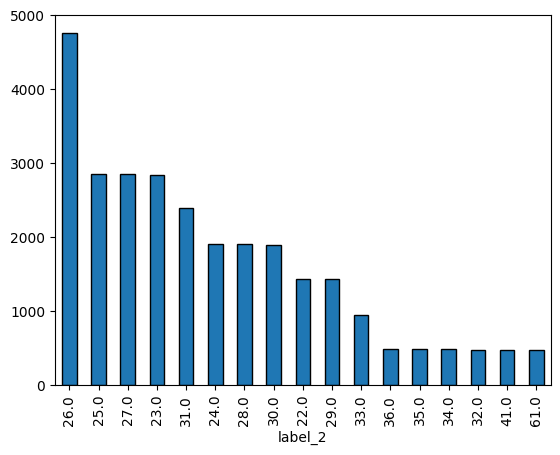

In [11]:
y_train_label1.value_counts().plot(kind='bar', edgecolor='black')

<Axes: xlabel='label_2'>

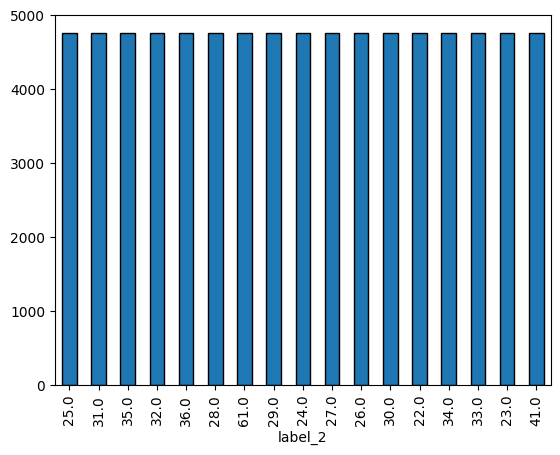

In [12]:
from imblearn.over_sampling import RandomOverSampler

RandomOversamples = RandomOverSampler(random_state=40)
X_train_label1_balanced, y_train_label1_balanced = RandomOversamples.fit_resample(X_train_label1, y_train_label1)
y_train_label1_balanced.value_counts().plot(kind='bar', edgecolor='black')

### create a model using Random KNN before feature engineering

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = useKNN(X_train_label1, y_train_label1, X_test_label1)
Summary = getSummary(y_test_label1, y_pred)

[[27  1  1  0  5  1  0  0  0  1  0  0  0  0  0  0  0]
 [ 2 54  2  3  8  1  0  0  1  0  0  0  0  0  0  0  0]
 [ 2  6 30  1  4  0  1  0  0  1  0  0  1  0  0  0  0]
 [ 2  5  2 50 10  4  1  0  2  2  0  1  0  0  0  0  0]
 [ 3  5  1  3 97  3  1  0  0  2  0  0  0  0  0  0  0]
 [ 1  3  2  3  7 57  2  1  0  4  1  0  0  0  0  0  0]
 [ 1  2  1  1  5  0 33  0  1  1  0  0  0  0  1  0  0]
 [ 2  3  1  1  5  4  0 28  0  1  0  0  0  0  0  0  0]
 [ 0  5  0  2  6  1  3  0 28  1  0  1  0  1  0  0  0]
 [ 2  5  0  5  5  3  3  1  0 38  0  1  0  0  2  0  0]
 [ 0  0  0  0  3  1  0  0  1  0  6  0  0  0  0  0  0]
 [ 0  2  1  1  1  2  0  0  0  0  0 23  0  0  0  0  0]
 [ 0  1  0  1  2  0  0  0  0  0  0  0  7  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0 10  0  0  0]
 [ 0  0  0  1  2  0  0  0  0  0  0  0  0  0  5  0  0]
 [ 0  2  0  1  3  0  0  0  0  0  0  0  0  0  0  8  0]
 [ 0  1  1  0  2  0  0  0  0  0  0  0  0  0  1  0 14]]
Accuracy: 0.6997282608695652
F1 Score: 0.7017571552585492
Precision: 0.7286811294

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = useKNN(X_train_label1_balanced, y_train_label1_balanced, X_test_label1)
Summary = getSummary(y_test_label1, y_pred)

[[30  0  0  0  0  1  0  3  1  0  0  0  0  0  0  1  0]
 [ 4 47  5  4  2  0  1  1  0  0  0  1  1  0  1  4  0]
 [ 1  3 34  0  1  1  1  2  0  0  0  1  1  0  0  0  1]
 [ 0  4  2 47  6  6  2  0  5  2  0  2  0  0  1  1  1]
 [ 6  3  4  2 79  4  2  4  2  4  1  1  2  0  0  1  0]
 [ 1  3  3  0  3 53  4  4  1  3  2  1  2  0  0  0  1]
 [ 3  3  2  0  3  0 32  0  1  1  0  0  0  0  1  0  0]
 [ 0  0  0  0  1  0  1 37  1  0  1  0  2  0  0  1  1]
 [ 1  4  1  0  0  2  0  1 34  2  0  1  0  2  0  0  0]
 [ 3  4  3  3  0  2  0  0  4 41  0  2  0  0  3  0  0]
 [ 0  1  0  0  1  0  0  0  1  0  7  0  0  0  0  1  0]
 [ 0  1  0  2  0  1  0  0  1  0  0 25  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0 10  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  8  0  0]
 [ 0  1  0  0  1  0  0  0  2  1  0  0  0  0  0  9  0]
 [ 0  1  2  0  1  0  0  0  0  0  0  0  0  0  0  1 14]]
Accuracy: 0.7024456521739131
F1 Score: 0.703039541090815
Precision: 0.71744092486

### create a model using Random SVC before feature engineering

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = useSVM(X_train_label1, y_train_label1, X_test_label1)
Summary = getSummary(y_test_label1, y_pred)


[[31  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 53  0  3  8  1  3  1  0  0  0  0  0  0  0  1  1]
 [ 0  3 36  0  1  3  1  0  0  0  0  0  2  0  0  0  0]
 [ 0  4  1 54  3  4  1  0  6  6  0  0  0  0  0  0  0]
 [ 0  5  3  6 96  2  1  0  1  1  0  0  0  0  0  0  0]
 [ 1  2  4  3  6 57  1  1  0  4  1  1  0  0  0  0  0]
 [ 2  1  1  0  2  3 30  2  1  3  0  1  0  0  0  0  0]
 [ 4  0  0  0  1  0  2 37  0  1  0  0  0  0  0  0  0]
 [ 0  0  1  5  3  3  0  0 36  0  0  0  0  0  0  0  0]
 [ 3  5  0  0  4  3  2  0  4 43  0  0  0  0  1  0  0]
 [ 0  0  0  1  1  0  0  0  0  0  9  0  0  0  0  0  0]
 [ 0  0  1  2  0  1  0  0  0  0  0 26  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 11  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  8  0  0]
 [ 0  1  0  0  0  0  0  0  0  1  1  0  0  0  0 11  0]
 [ 0  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0 17]]
Accuracy: 0.7676630434782609
F1 Score: 0.7669669722016887
Precision: 0.7691834281

In [20]:
y_pred = useSVM(X_train_label1, y_train_label1, X_test_label1, "balanced")
Summary = getSummary(y_test_label1, y_pred)

[[31  0  0  0  4  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 1 55  0  2  5  1  4  1  0  0  0  0  0  0  0  1  1]
 [ 0  2 37  0  1  3  1  0  0  0  0  0  2  0  0  0  0]
 [ 0  5  1 52  4  2  2  0  6  7  0  0  0  0  0  0  0]
 [ 1  7  4  8 91  1  1  0  1  1  0  0  0  0  0  0  0]
 [ 1  1  3  3  4 58  2  2  0  5  1  1  0  0  0  0  0]
 [ 2  2  3  0  0  4 28  2  0  4  0  1  0  0  0  0  0]
 [ 3  0  0  0  2  1  2 35  0  2  0  0  0  0  0  0  0]
 [ 0  0  1  2  2  2  1  0 40  0  0  0  0  0  0  0  0]
 [ 2  3  0  0  3  3  2  0  4 48  0  0  0  0  0  0  0]
 [ 0  0  0  1  1  0  0  0  0  0  9  0  0  0  0  0  0]
 [ 0  0  1  2  0  0  0  0  0  0  0 27  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 11  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  8  0  0]
 [ 0  2  0  0  0  0  0  0  0  1  0  0  0  0  0 11  0]
 [ 0  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0 17]]
Accuracy: 0.7717391304347826
F1 Score: 0.7713664034243866
Precision: 0.7734470685

### create a model using Random LRC before feature engineering

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = useLRC(X_train_label1_balanced, y_train_label1_balanced, X_test_label1)
Summary = getSummary(y_test_label1, y_pred)

[[28  0  0  1  4  1  0  0  0  1  0  1  0  0  0  0  0]
 [ 2 43  0  3  5  4  2  2  1  6  0  0  0  0  1  1  1]
 [ 0  2 33  0  2  2  1  1  0  1  0  1  2  0  0  0  1]
 [ 0  7  3 42  6  3  3  0  3 10  0  0  0  0  1  0  1]
 [ 3  3  6  7 69  5  3  2  2 11  1  1  0  0  1  1  0]
 [ 2  1  2  3  4 50  4  4  0  7  1  3  0  0  0  0  0]
 [ 0  0  2  1  1  2 31  2  2  3  0  1  1  0  0  0  0]
 [ 0  1  0  0  2  0  1 37  0  2  0  0  2  0  0  0  0]
 [ 0  1  2  2  1  1  1  1 36  1  0  1  1  0  0  0  0]
 [ 1  3  1  3  3  7  4  0  2 39  0  0  0  0  1  1  0]
 [ 0  0  0  0  1  0  0  0  0  0 10  0  0  0  0  0  0]
 [ 0  0  1  1  0  0  0  0  0  0  0 28  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0 10  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  8  0  0]
 [ 0  1  0  0  0  0  0  0  0  1  0  0  0  0  0 12  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0 18]]
Accuracy: 0.6847826086956522
F1 Score: 0.6832756715235968
Precision: 0.6897833421

c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = useLRC(X_train_label1, y_train_label1, X_test_label1, "balanced")
Summary = getSummary(y_test_label1, y_pred)

[[29  0  0  1  3  1  0  0  0  1  0  1  0  0  0  0  0]
 [ 2 43  0  3  5  3  2  3  1  6  0  0  0  0  1  1  1]
 [ 0  3 33  0  2  2  1  1  0  0  0  1  2  0  0  0  1]
 [ 0  8  3 42  6  4  3  0  3  7  0  1  0  0  1  0  1]
 [ 0  6  5  5 72  4  4  2  4 10  0  2  0  0  0  1  0]
 [ 2  0  1  3  6 50  4  1  2  8  1  3  0  0  0  0  0]
 [ 0  0  1  0  1  1 35  1  2  3  0  1  1  0  0  0  0]
 [ 0  1  1  0  2  0  0 36  1  2  0  0  2  0  0  0  0]
 [ 0  0  1  2  1  1  1  1 37  1  0  2  1  0  0  0  0]
 [ 1  2  1  2  3  7  3  0  1 43  0  0  0  0  1  1  0]
 [ 0  0  0  0  1  0  0  0  0  0 10  0  0  0  0  0  0]
 [ 1  0  1  1  0  0  0  0  0  0  0 27  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0 10  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  8  0  0]
 [ 0  1  0  0  0  0  0  0  0  1  0  0  0  0  0 12  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0 18]]
Accuracy: 0.6997282608695652
F1 Score: 0.6978833588407708
Precision: 0.7049739468

c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Add KNN predicted data since it has the better accuracy to csv file

In [ ]:
# from sklearn.metrics import classification_report, confusion_matrix

# predicted_values = dict()

# Before_FE_predict_label = useKNN(X_train_label1, y_train_label1, X_test_predict_label1)
# predicted_values['Predicted labels before feature engineering'] = Before_FE_predict_label

### Find best k features and select

    (before selecting features checked if k is enough to achieve a better accuracy and finally come up with k features is enough)

In [23]:
selected_features = getSelectedFeatures(300, X_train_label1, y_train_label1)

# print selected features
print(selected_features)

Index(['feature_1', 'feature_2', 'feature_6', 'feature_8', 'feature_10',
       'feature_12', 'feature_15', 'feature_16', 'feature_17', 'feature_21',
       ...
       'feature_743', 'feature_744', 'feature_745', 'feature_749',
       'feature_750', 'feature_751', 'feature_754', 'feature_760',
       'feature_764', 'feature_765'],
      dtype='object', length=300)


In [24]:
X_train_selected_label1 = X_train_label1[list(selected_features)]
X_test_selected_label1 = X_test_label1[list(selected_features)]
X_test_predict_selected_label1 = X_test_predict_label1[list(selected_features)]

### Check the accuracy of the selected features are enogh or not using KNN

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = useKNN(X_train_selected_label1, y_train_label1, X_test_selected_label1)
Summary = getSummary(y_test_label1, y_pred)

print("using KNN after redusing the features to create model: ")
print(classification_report)

[[ 28   1   1   1   3   1   0   1   0   0   0   0   0   0   0   0   0]
 [  2  54   2   2   7   2   0   0   0   1   0   0   0   0   0   1   0]
 [  2   3  34   1   4   0   1   0   0   0   0   0   1   0   0   0   0]
 [  0   8   2  50  12   2   1   0   2   1   0   1   0   0   0   0   0]
 [  2   3   2   2 100   3   1   0   0   1   0   1   0   0   0   0   0]
 [  2   5   5   1   4  58   1   1   1   3   0   0   0   0   0   0   0]
 [  1   3   2   1   6   1  31   1   0   0   0   0   0   0   0   0   0]
 [  2   3   1   1   4   4   0  29   0   1   0   0   0   0   0   0   0]
 [  1   5   1   0   5   0   1   0  30   2   0   1   0   2   0   0   0]
 [  3   5   0   3   6   3   2   0   0  40   0   1   0   0   1   1   0]
 [  0   0   0   0   3   1   1   0   0   0   6   0   0   0   0   0   0]
 [  0   0   1   1   2   2   0   0   0   0   0  24   0   0   0   0   0]
 [  0   1   1   1   1   0   0   0   0   0   0   0   7   0   0   0   0]
 [  0   1   0   0   0   0   0   0   0   0   0   0   0  10   0   0   0]
 [  0 

### Check the accuracy of the selected features are enogh or not using SVC

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = useSVM(X_train_selected_label1, y_train_label1, X_test_selected_label1)
Summary = getSummary(y_test_label1, y_pred)

print("using SVM after redusing the features to create model: ")
print(classification_report)

[[28  0  1  0  4  0  0  2  0  1  0  0  0  0  0  0  0]
 [ 2 43  1  5 11  1  1  1  1  3  0  0  0  0  1  1  0]
 [ 1  3 30  2  4  5  0  0  0  1  0  0  0  0  0  0  0]
 [ 2  9  0 43  6  7  1  0  2  7  1  0  0  0  0  1  0]
 [ 1 10  3  7 83  3  5  0  0  3  0  0  0  0  0  0  0]
 [ 0  2  1  4  8 51  3  2  2  5  0  3  0  0  0  0  0]
 [ 1  1  1  3  3  3 29  1  2  2  0  0  0  0  0  0  0]
 [ 2  3  0  4  5  1  1 28  0  0  0  0  1  0  0  0  0]
 [ 0  3  0  6  1  1  2  0 33  0  0  1  0  0  0  0  1]
 [ 5  5  2  2  4  4  3  1  3 36  0  0  0  0  0  0  0]
 [ 0  0  0  1  2  0  0  0  0  0  8  0  0  0  0  0  0]
 [ 1  1  1  3  1  0  0  0  0  0  0 23  0  0  0  0  0]
 [ 0  0  0  0  0  1  1  1  0  0  0  0  8  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  8  0  0]
 [ 0  2  0  0  0  0  0  0  0  1  0  0  0  0  0 11  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  1  0 17]]
Accuracy: 0.6644021739130435
F1 Score: 0.6659159238267213
Precision: 0.6726012533

### Create a PCA to create new features using train data

In [27]:
pca, X_train_pca, X_test_pca, X_test_predict_pca = apply_pca(0.99, X_train_label1, X_test_label1, X_test_predict_label1)
print(X_test_pca.keys())
# print(loadings.to_string())

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       ...
       'PC272', 'PC273', 'PC274', 'PC275', 'PC276', 'PC277', 'PC278', 'PC279',
       'PC280', 'PC281'],
      dtype='object', length=281)


In [28]:
pca1, X_train_pca1, X_test_pca1, X_test_predict_pca1 = apply_pca(0.95, X_train_label1, X_test_label1, X_test_predict_label1)
print(X_test_pca1.keys())
# print(loadings.to_string())

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       ...
       'PC103', 'PC104', 'PC105', 'PC106', 'PC107', 'PC108', 'PC109', 'PC110',
       'PC111', 'PC112'],
      dtype='object', length=112)


<Axes: xlabel='label_2'>

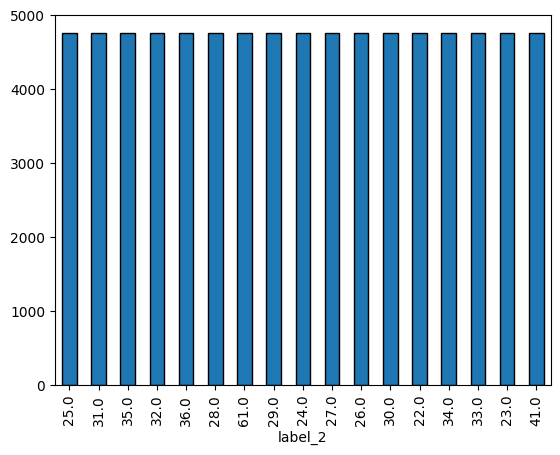

In [29]:
from imblearn.over_sampling import RandomOverSampler

RandomOversamples = RandomOverSampler(random_state=40)
X_train_pca_balanced, y_train_pca_balanced = RandomOversamples.fit_resample(X_train_pca, y_train_label1)
y_train_pca_balanced.value_counts().plot(kind='bar', edgecolor='black')

In [30]:
X_train_pca_balanced.head()
print(X_train_pca_balanced.shape)

(80954, 281)


### Find the status of the model using KNN after joining PCAs

In [31]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = useKNN(X_train_pca, y_train_label1, X_test_pca, 5)
Summary = getSummary(y_test_label1, y_pred)

print("Mean absolute error after adding new pca features of the model Lable_1: ")

[[27  1  1  0  5  1  0  0  0  1  0  0  0  0  0  0  0]
 [ 1 54  2  3  8  2  0  0  1  0  0  0  0  0  0  0  0]
 [ 2  6 30  0  4  1  1  0  0  1  0  0  1  0  0  0  0]
 [ 2  5  2 49 10  5  1  0  2  2  0  1  0  0  0  0  0]
 [ 3  5  1  3 97  3  1  0  0  2  0  0  0  0  0  0  0]
 [ 1  3  2  3  7 56  2  1  0  4  1  0  1  0  0  0  0]
 [ 1  2  1  1  5  0 34  0  1  0  0  0  0  0  1  0  0]
 [ 2  3  1  1  5  4  0 28  0  1  0  0  0  0  0  0  0]
 [ 0  5  0  2  6  1  3  0 28  1  0  1  0  1  0  0  0]
 [ 2  4  1  5  5  3  3  1  0 37  0  1  0  0  2  1  0]
 [ 0  0  0  0  3  0  0  0  1  0  7  0  0  0  0  0  0]
 [ 0  2  1  1  1  2  0  0  0  0  0 23  0  0  0  0  0]
 [ 1  1  0  1  2  0  0  0  0  0  0  0  6  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0 10  0  0  0]
 [ 0  0  0  1  2  0  0  0  0  0  0  0  0  0  5  0  0]
 [ 0  2  0  1  3  0  0  0  0  0  0  0  0  0  0  8  0]
 [ 0  1  1  0  2  0  0  0  0  0  0  0  0  0  1  0 14]]
Accuracy: 0.6970108695652174
F1 Score: 0.6984906251951799
Precision: 0.7238337228

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = useKNN(X_train_pca_balanced, y_train_pca_balanced, X_test_pca, 6)
Summary = getSummary(y_test_label1, y_pred)

print("Mean absolute error after adding new pca features of the model Lable_1: ")


[[30  0  0  0  0  1  0  3  1  0  0  0  0  0  0  1  0]
 [ 5 46  4  4  2  0  1  1  0  0  0  1  1  0  1  5  0]
 [ 1  4 31  0  1  1  1  1  0  2  0  1  1  0  0  0  2]
 [ 1  3  2 47  6  4  3  0  4  2  0  4  0  0  1  1  1]
 [ 8  4  4  3 74  4  2  4  3  4  1  1  2  0  0  1  0]
 [ 2  3  4  0  2 53  4  4  1  1  2  1  3  0  0  0  1]
 [ 3  3  1  0  2  0 32  1  1  2  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  1  1 36  1  0  1  0  3  0  0  1  1]
 [ 1  4  0  0  0  1  0  1 32  3  0  1  0  2  0  3  0]
 [ 3  5  1  2  0  1  1  0  3 43  0  2  0  0  4  0  0]
 [ 1  1  0  0  1  0  0  0  1  0  6  0  0  0  0  1  0]
 [ 0  1  0  1  0  1  0  0  1  0  0 26  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0 10  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  8  0  0]
 [ 0  2  0  0  1  0  0  0  2  0  0  0  0  0  0  9  0]
 [ 0  0  2  0  1  1  0  0  0  0  0  0  0  0  0  0 15]]
Accuracy: 0.6902173913043478
F1 Score: 0.6922007586240193
Precision: 0.7121599554

### Find the status of the model using SVC after joining PCAs

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = useSVM(X_train_pca, y_train_label1, X_test_pca)
Summary = getSummary(y_test_label1, y_pred)

[[23  2  1  0  5  1  0  1  0  3  0  0  0  0  0  0  0]
 [ 1 44  0  7  8  1  2  1  2  3  0  0  0  0  1  0  1]
 [ 1  3 35  0  2  2  1  1  0  1  0  0  0  0  0  0  0]
 [ 0  7  2 47  8  4  3  0  2  4  0  1  0  0  1  0  0]
 [ 1  6  3  8 87  1  3  1  3  2  0  0  0  0  0  0  0]
 [ 1  0  2  4  9 46  3  2  1 10  1  2  0  0  0  0  0]
 [ 1  1  3  2  3  2 26  2  3  3  0  0  0  0  0  0  0]
 [ 2  4  0  0  8  1  0 29  0  1  0  0  0  0  0  0  0]
 [ 0  1  2  3  2  1  0  0 38  0  0  1  0  0  0  0  0]
 [ 3  5  0  2  7  5  2  0  2 37  0  0  1  0  1  0  0]
 [ 0  0  0  1  1  0  0  0  0  0  9  0  0  0  0  0  0]
 [ 1  0  1  1  1  1  0  0  1  1  0 23  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0 10  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  8  0  0]
 [ 0  1  0  0  0  0  0  0  0  1  0  0  0  0  0 12  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  1  0 17]]
Accuracy: 0.6807065217391305
F1 Score: 0.6805103571822725
Precision: 0.6871960699

In [34]:
from sklearn.svm import SVC

# standardize the data set
svc = SVC(kernel="linear" , class_weight = "balanced")

svc.fit(X_train_pca, y_train_label1)
y_pred = svc.predict(X_test_pca)
Summary = getSummary(y_test_label1, y_pred)

[[24  1  1  0  5  1  0  1  0  3  0  0  0  0  0  0  0]
 [ 1 46  1  6  1  3  3  1  2  5  0  0  0  0  1  0  1]
 [ 0  2 37  0  2  2  2  1  0  0  0  0  0  0  0  0  0]
 [ 0  8  1 47  3  3  5  0  2  7  0  2  0  0  1  0  0]
 [ 1  6  6  9 80  3  4  1  2  3  0  0  0  0  0  0  0]
 [ 3  0  3  4  1 48  4  4  1 10  1  2  0  0  0  0  0]
 [ 2  3  2  1  1  1 26  2  3  5  0  0  0  0  0  0  0]
 [ 1  4  0  1  4  0  0 34  0  1  0  0  0  0  0  0  0]
 [ 0  1  1  3  0  1  0  0 41  0  0  1  0  0  0  0  0]
 [ 3  3  0  3  5  5  2  1  2 39  0  0  1  0  1  0  0]
 [ 0  0  0  1  0  0  0  0  1  0  9  0  0  0  0  0  0]
 [ 1  0  1  2  0  1  0  0  1  1  0 23  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0 10  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  8  0  0]
 [ 0  1  0  0  0  0  0  0  0  1  0  0  0  0  0 12  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  1  0 17]]
Accuracy: 0.6942934782608695
F1 Score: 0.6952191413902533
Precision: 0.7008880070

### Join the newly created features with the selected features and find the status of the model using Random forest

In [35]:
X_train_new_label1 = X_train_selected_label1.join(X_train_pca)
X_test_new_label1 = X_test_selected_label1.join(X_test_pca)
X_test_predict_new_label1 = X_test_predict_selected_label1.join(X_test_predict_pca)

# X_train_new_label1 = pd.concat([X_train_pca, X_train_selected_label1], axis=1)
# X_test_new_label1 = pd.concat([X_test_pca, X_test_selected_label1], axis=1)
# X_test_predict_new_label1 = pd.concat([X_test_predict_pca, X_test_predict_selected_label1], axis=1)
X_train_new_label1.head()

,feature_1,feature_2,feature_6,feature_8,feature_10,feature_12,feature_15,feature_16,feature_17,feature_21,...,PC272,PC273,PC274,PC275,PC276,PC277,PC278,PC279,PC280,PC281
0,-1.097872,1.093679,-1.086296,-1.005763,-0.857104,0.280937,-0.664533,0.331271,0.222281,-1.029979,...,0.268871,0.006346,-0.162051,-0.035380,0.041703,-0.038624,-0.007183,0.148532,-0.002514,-0.072718
1,0.438258,-2.578349,0.421080,0.175086,2.765418,0.686275,-2.593676,1.650250,0.110657,1.496721,...,-0.222521,0.458864,0.089874,0.053062,0.172535,-0.069059,-0.223140,0.226098,-0.413568,0.013557
2,0.603222,1.451418,-0.284776,0.013512,-0.575342,-0.246632,1.123984,1.477445,-0.141757,0.521946,...,0.196154,0.288007,-0.013459,0.405686,0.157198,0.110310,0.022819,-0.209822,-0.081769,0.177543
3,-0.056126,-1.559638,-0.049784,1.979576,1.191126,-0.085372,-1.365254,0.400469,-1.479610,0.660976,...,-0.515003,0.056554,-0.101393,-0.152466,-0.310150,0.013124,-0.745806,0.186774,-0.297945,-0.456953
4,0.583958,-0.610803,-0.868977,-0.592264,0.209495,1.364528,-0.003693,0.781686,-0.033797,-0.104245,...,0.215943,-0.266730,-0.042353,0.247577,-0.294581,0.397210,0.077954,0.157887,0.060016,-0.150609


### Find the status of the model using KNN after joining PCAs

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = useKNN(X_train_new_label1, y_train_label1, X_test_new_label1)
Summary = getSummary(y_test_label1, y_pred)


[[27  1  1  0  4  1  0  1  0  1  0  0  0  0  0  0  0]
 [ 1 55  2  2  8  2  0  0  1  0  0  0  0  0  0  0  0]
 [ 1  6 30  1  5  0  1  0  0  1  0  0  1  0  0  0  0]
 [ 0  5  2 51 11  3  2  0  2  2  0  1  0  0  0  0  0]
 [ 2  5  2  2 97  3  1  0  0  2  0  1  0  0  0  0  0]
 [ 1  4  3  2  6 58  1  1  0  4  1  0  0  0  0  0  0]
 [ 1  2  1  1  5  1 32  1  1  0  0  0  0  0  1  0  0]
 [ 2  3  1  0  5  4  0 29  0  1  0  0  0  0  0  0  0]
 [ 1  4  0  1  6  1  2  0 29  1  0  1  0  2  0  0  0]
 [ 2  5  1  4  5  2  4  0  0 40  0  0  0  0  1  1  0]
 [ 0  0  0  0  3  0  0  0  1  0  7  0  0  0  0  0  0]
 [ 1  1  0  1  1  2  0  0  0  0  0 24  0  0  0  0  0]
 [ 1  1  0  1  2  0  0  0  0  0  0  0  6  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0 10  0  0  0]
 [ 0  1  0  0  2  0  0  0  0  0  0  0  0  0  5  0  0]
 [ 1  2  0  0  3  0  0  0  0  0  0  0  0  0  0  8  0]
 [ 0  1  1  0  2  0  1  0  0  0  0  0  0  0  1  0 13]]
Accuracy: 0.7078804347826086
F1 Score: 0.7100099673634187
Precision: 0.7357357455

### Find the status of the model using SVC after joining PCAs

In [37]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = useSVM(X_train_new_label1, y_train_label1, X_test_new_label1)
getSummary(y_test_label1, y_pred)


[[26  1  1  0  5  1  0  0  0  2  0  0  0  0  0  0  0]
 [ 1 55  1  2  5  2  0  1  0  2  0  0  0  0  1  1  0]
 [ 0  4 34  0  2  4  1  0  0  1  0  0  0  0  0  0  0]
 [ 1  7  0 47  5  6  3  0  2  6  1  1  0  0  0  0  0]
 [ 0  5  3  7 92  1  3  0  1  3  0  0  0  0  0  0  0]
 [ 1  0  1  3  8 57  2  1  0  6  1  1  0  0  0  0  0]
 [ 3  3  2  1  3  2 29  2  0  1  0  0  0  0  0  0  0]
 [ 3  2  0  0  5  0  0 32  0  2  0  0  1  0  0  0  0]
 [ 0  0  1  3  2  1  0  0 40  0  0  1  0  0  0  0  0]
 [ 2  4  0  0  3  8  1  1  2 43  0  0  1  0  0  0  0]
 [ 0  1  0  1  1  0  0  0  0  0  8  0  0  0  0  0  0]
 [ 1  0  1  1  1  1  0  0  0  1  0 24  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0 10  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  8  0  0]
 [ 0  1  0  0  0  0  0  0  1  1  0  0  0  0  0 11  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0  0  1  0 17]]
Accuracy: 0.7377717391304348
F1 Score: 0.7380420194376017
Precision: 0.7443922627

['Accuracy: 0.7377717391304348',
 'F1 Score: 0.7380420194376017',
 'Precision: 0.744392262756582',
 'Recall: 0.7377717391304348']

### Hyper parameter Tuning

In [38]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
gs = RandomizedSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, n_jobs = -1)

In [39]:
# fit the model on our train set
g_res = gs.fit(X_train_label1, y_train_label1)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [40]:
# get the hyperparameters with the best score
print(gs.best_estimator_.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'euclidean', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'distance'}


In [41]:
knn = KNeighborsClassifier(algorithm= 'auto', leaf_size= 30, metric= 'manhattan', metric_params= None, n_jobs= None, n_neighbors= 5, p= 2, weights= 'distance')
knn.fit(X_train_pca, y_train_label1)
y_pred = knn.predict(X_test_pca)
Summary = getSummary(y_test_label1, y_pred)

[[ 29   1   0   1   4   1   0   0   0   0   0   0   0   0   0   0   0]
 [  2  54   3   1   4   2   1   0   0   0   0   1   0   0   0   3   0]
 [  0   2  37   0   3   1   1   1   1   0   0   0   0   0   0   0   0]
 [  0   2   1  55  10   2   2   0   3   3   0   1   0   0   0   0   0]
 [  0   0   0   2 106   5   1   0   0   1   0   0   0   0   0   0   0]
 [  0   1   1   0   6  63   3   3   0   3   0   0   1   0   0   0   0]
 [  0   2   1   2   3   0  36   0   0   1   0   0   0   0   1   0   0]
 [  0   2   0   0   2   3   0  37   0   0   0   0   0   0   0   0   1]
 [  0   2   1   0   3   0   1   0  38   1   0   1   0   1   0   0   0]
 [  0   1   0   2   4   4   0   0   0  52   0   1   0   0   1   0   0]
 [  0   0   0   0   3   1   0   0   0   0   7   0   0   0   0   0   0]
 [  0   0   1   2   1   1   0   0   0   0   0  25   0   0   0   0   0]
 [  0   0   1   0   0   0   0   1   0   0   0   0   9   0   0   0   0]
 [  0   1   0   0   0   0   0   0   0   0   0   0   0  10   0   0   0]
 [  0 

In [42]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
gs = RandomizedSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, n_jobs = -1)

In [43]:
# fit the model on our train set
g_res = gs.fit(X_train_new_label1, y_train_label1)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [44]:
# get the hyperparameters with the best score
print(gs.best_estimator_.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'manhattan', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'distance'}


In [45]:
knn = KNeighborsClassifier(algorithm= 'auto', leaf_size= 30, metric= 'manhattan', metric_params= None, n_jobs= None, n_neighbors= 5, p= 2, weights= 'distance')
knn.fit(X_train_pca, y_train_label1)
y_pred = knn.predict(X_test_pca)
Summary = getSummary(y_test_label1, y_pred)

[[ 29   1   0   1   4   1   0   0   0   0   0   0   0   0   0   0   0]
 [  2  54   3   1   4   2   1   0   0   0   0   1   0   0   0   3   0]
 [  0   2  37   0   3   1   1   1   1   0   0   0   0   0   0   0   0]
 [  0   2   1  55  10   2   2   0   3   3   0   1   0   0   0   0   0]
 [  0   0   0   2 106   5   1   0   0   1   0   0   0   0   0   0   0]
 [  0   1   1   0   6  63   3   3   0   3   0   0   1   0   0   0   0]
 [  0   2   1   2   3   0  36   0   0   1   0   0   0   0   1   0   0]
 [  0   2   0   0   2   3   0  37   0   0   0   0   0   0   0   0   1]
 [  0   2   1   0   3   0   1   0  38   1   0   1   0   1   0   0   0]
 [  0   1   0   2   4   4   0   0   0  52   0   1   0   0   1   0   0]
 [  0   0   0   0   3   1   0   0   0   0   7   0   0   0   0   0   0]
 [  0   0   1   2   1   1   0   0   0   0   0  25   0   0   0   0   0]
 [  0   0   1   0   0   0   0   1   0   0   0   0   9   0   0   0   0]
 [  0   1   0   0   0   0   0   0   0   0   0   0   0  10   0   0   0]
 [  0 

*  Hyper parameter Tuning for KNN model

In [46]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
gs = RandomizedSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, n_jobs = -1)

In [47]:
# fit the model on our train set
g_res = gs.fit(X_train_pca, y_train_label1)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [48]:
# get the hyperparameters with the best score
g_res.best_params_

{'weights': 'distance', 'n_neighbors': 9, 'metric': 'manhattan'}

In [49]:
knn = KNeighborsClassifier(algorithm= 'auto', leaf_size= 30, metric= 'manhattan', metric_params= None, n_jobs= None, n_neighbors= 5, p= 2, weights= 'distance')
knn.fit(X_train_pca, y_train_label1)
y_pred = knn.predict(X_test_pca)
Summary = getSummary(y_test_label1, y_pred)

[[ 29   1   0   1   4   1   0   0   0   0   0   0   0   0   0   0   0]
 [  2  54   3   1   4   2   1   0   0   0   0   1   0   0   0   3   0]
 [  0   2  37   0   3   1   1   1   1   0   0   0   0   0   0   0   0]
 [  0   2   1  55  10   2   2   0   3   3   0   1   0   0   0   0   0]
 [  0   0   0   2 106   5   1   0   0   1   0   0   0   0   0   0   0]
 [  0   1   1   0   6  63   3   3   0   3   0   0   1   0   0   0   0]
 [  0   2   1   2   3   0  36   0   0   1   0   0   0   0   1   0   0]
 [  0   2   0   0   2   3   0  37   0   0   0   0   0   0   0   0   1]
 [  0   2   1   0   3   0   1   0  38   1   0   1   0   1   0   0   0]
 [  0   1   0   2   4   4   0   0   0  52   0   1   0   0   1   0   0]
 [  0   0   0   0   3   1   0   0   0   0   7   0   0   0   0   0   0]
 [  0   0   1   2   1   1   0   0   0   0   0  25   0   0   0   0   0]
 [  0   0   1   0   0   0   0   1   0   0   0   0   9   0   0   0   0]
 [  0   1   0   0   0   0   0   0   0   0   0   0   0  10   0   0   0]
 [  0 

*  Hyper parameter Tuning for SVM modle

In [50]:
from sklearn.model_selection import RandomizedSearchCV as rscv
svc_tuninh2 = SVC(class_weight="balanced")
param_dist1 = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf', 'linear']
}
random_search2 = rscv(
    svc_tuninh2,
    param_distributions=param_dist1,
    n_iter=2, cv=5, n_jobs=-1,
    )
random_search2.fit(X_train_pca, y_train_label1)

RandomizedSearchCV(cv=5, estimator=SVC(class_weight='balanced'), n_iter=2,
                   n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf', 'linear']})

In [51]:
predict2 = random_search2.predict(X_test_pca)
accuracy_score(y_test_label1, predict2)

0.8573369565217391

In [52]:
print(random_search2.best_estimator_.get_params())

{'C': 1000, 'break_ties': False, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.001, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


*  Hyper parameter Tuning for Logistic regression model

In [57]:
# from sklearn.model_selection import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

logModel = LogisticRegression()
param_grid = [
    {'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','sag','saga']
    }
]
clf = RandomizedSearchCV(logModel, param_distributions = param_grid, cv = 3, verbose=True, n_jobs=-1)
best_clf = clf.fit(X_train_pca, y_train_label1)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


c:\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python311\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual

In [58]:
predict2 = clf.predict(X_test_pca)
accuracy_score(y_test_label1, predict2)

0.6304347826086957

In [59]:
print(clf.best_estimator_.get_params())

{'C': 206.913808111479, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


## Get best predictions

In [61]:
svc_pred = SVC(C= 1000, break_ties= False, cache_size= 200, class_weight= 'balanced', coef0= 0.0, decision_function_shape= 'ovr', degree= 3, gamma= 0.001, kernel= 'rbf', max_iter= -1, probability= False, random_state= None, shrinking= True, tol= 0.001, verbose= False)
svc_pred.fit(X_train_pca, y_train_label1)

best_predict = svc_pred.predict(X_test_pca)
accuracy_score(y_test_label1, best_predict)

y_pred_test = svc_pred.predict(X_test_predict_pca)

In [63]:
getSummary(y_test_label1, best_predict)

[[ 32   1   0   0   3   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1  58   2   3   2   0   2   0   2   0   0   0   0   0   0   1   0]
 [  0   0  45   0   1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   3   0  63   6   0   1   0   0   4   0   1   0   0   0   0   0]
 [  1   2   4   3 103   0   0   0   1   1   0   0   0   0   0   0   0]
 [  0   2   0   2   6  65   2   2   0   1   0   0   1   0   0   0   0]
 [  0   3   1   1   2   1  37   0   1   0   0   0   0   0   0   0   0]
 [  2   1   0   0   1   0   0  38   2   1   0   0   0   0   0   0   0]
 [  0   1   0   0   1   0   0   0  46   0   0   0   0   0   0   0   0]
 [  1   1   2   1   1   4   1   0   0  54   0   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0   0   0   1   9   0   0   0   0   0   0]
 [  0   0   1   1   1   1   0   0   0   0   0  26   0   0   0   0   0]
 [  0   0   1   0   0   1   0   0   0   0   0   0   9   0   0   0   0]
 [  0   1   0   0   0   0   0   0   0   0   0   0   0  10   0   0   0]
 [  0 

['Accuracy: 0.8573369565217391',
 'F1 Score: 0.8575289055094555',
 'Precision: 0.8622580562124706',
 'Recall: 0.8573369565217391']

In [66]:

# Create DataFrame
df = pd.DataFrame(y_pred_test, columns =["label_2"] )
df.head()
df.to_csv("Project_Layer_12_Label_2_new.csv", index=False)